In [2]:
#for reading csv files, converting data to dataframe for easier manipulaton
import pandas as pd
#for visualizing various aspects of dataset
import matplotlib.pyplot as plt
import seaborn as sns
#to visualize the general freuency of words
from wordcloud import WordCloud,STOPWORDS

#for regular expression related works
import re


# for natural language processing
import nltk
## stopwords do nor provide any meaning to sentence
from nltk.corpus import stopwords
##for lemmatizing
from nltk.stem import WordNetLemmatizer


#for machine learning task
##for  transforming text to vector
from sklearn.feature_extraction.text import CountVectorizer
## for hyperparametertuning
from sklearn.model_selection import GridSearchCV
## one of the machine learning algorithm
from sklearn.ensemble import RandomForestClassifier


# for evaluation of model trained
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [3]:
def remove_elements(sentence, elements,pos_emo_count,neg_emo_count,neutral_emo_count):
    for element in elements:
        sentence = sentence.replace(element, '')
    if (pos_emo_count>neg_emo_count and pos_emo_count> neutral_emo_count):
        sentence=sentence+"❤️"
    elif (neg_emo_count>pos_emo_count and neg_emo_count> neutral_emo_count):
        sentence=sentence+"👎"
    
    return sentence

def extract_emojis(text):
    # Define the emoji pattern using Unicode ranges
    emoji_pattern = re.compile(
        "[" 
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    # Find all emojis in the text and split them into individual emojis
    emojis = emoji_pattern.findall(text)
    return emojis

def emoji_finder_and_replacer(text):
    emojis = extract_emojis(text)

    positive_emoji = ['❤️','🥰','🤍','❤️','👌','🙏','😊','😊','😃','🤩','💜','🌹','💯','💙','❤','😍','♥️','💛','💟','💚','😊','💕','👍','😂','🙌','🤑','💖','✨','😊','🎉','💞','😝','😈','😃','😁','😎','😘','💓','😉','😄','😀','😜','💗','😆','😛','😻','🙋','❣️','🙂','😇','💝','😋','🤗','🙆','🤓','😚','😙','😸','😼','😺','😽']
    neutral_emoji = []
    negative_emoji = ['👽','💩','😳','🙄','😑','🙇','🙎','😐','😶','😭','😱','👎','🙄','😡','😫','😨','😢','💀','🤔','👻','😓','💦','😤','😩','😴','💔','😒','😪','😈','😣','😮','😡','😕','😔','😠','😷','😥','😞','😲','😰','🙀','😖','😧','😟','😹','😵','😶','😯','🤒','🤕','😾','💤']
    pos_emo_count=0
    neg_emo_count=0
    neutral_emo_count=0
    emojis_list=[]
    for emoji_x in emojis:
        for l in range(0,len(emoji_x)):
            emoji=emoji_x[l]
            emojis_list.append(emoji)
            if emoji in positive_emoji:
                pos_emo_count += 1
            elif emoji in negative_emoji:
                neg_emo_count += 1
            else:
                neutral_emo_count += 1
    new_sentence= remove_elements(text,emojis_list,pos_emo_count,neg_emo_count,neutral_emo_count)
    return new_sentence


# Example usage
text = "very amazing and good application for buy things online it's awesome appThis app is good😤"



In [4]:
review_df= pd.read_csv("app_reviews.csv")
review_df.head()

,score,at,text
0,5,2024-07-03 11:35:04,this app is great and easy for all shopping an...
1,1,2024-07-03 11:15:29,Ekta faltu app shob cheye baje refund er nam k...
2,4,2024-07-03 11:05:57,It is a very useful app having good experience...
3,4,2024-07-03 11:02:58,its good
4,1,2024-07-03 10:52:59,Daraz top level Thief in Bangladesh.My gift ca...


In [5]:
review_df["text"]=review_df["text"].apply(emoji_finder_and_replacer)

In [6]:
review_df.to_csv("processed_csv.csv")

In [7]:
import enchant   #for spelling correction and checking
from nltk.metrics import edit_distance  # to find the case where spelling correction is needed
d = enchant.Dict("en_US")

from nltk.corpus import wordnet as wn
from nltk import pos_tag
from collections import defaultdict
import string

#Lets define some function for replacement of common sentece use cases
replacement_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'cannot'),
 (r'i\'m', 'i am'),
 (r'wanna', 'want'),
 (r'gonna', 'going to'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would'),
]
patterns = [(re.compile(regex), repl) for (regex, repl) in replacement_patterns]

def replace_function(text):
    s = text
    for (pattern, repl) in patterns:
        s = re.sub(pattern, repl, s)
    return s

stopwords_list=set(nltk.corpus.stopwords.words("english"))
alphabets = list(string.ascii_lowercase)
stopwords_list.update(list(STOPWORDS))
#add some more frequently occuring words in the corpora that donot have any useful meaning in sentiment analysis
stopword_from_text = ['app', "..","...","....",'.', ',', "'s", 'daraz',"radar", 'shopping', 'order', 'online', "n't", 'product', 'daraz', 'products', '...', '..', 'buy', 'much', '?', 'one']
stopwords_list.update(stopword_from_text)
stopwords_list = list(stopwords_list)+alphabets



#the following function remove stopwords
def remove_stopwords(text):
    text_without_stopword=""
    text=text.lower()
    for i in str(text).split():
        if i not in stopwords_list:
            text_without_stopword=text_without_stopword+" "+str(i)
    return text_without_stopword.strip()




#the following function is used for spelling checking and correction
def correct_spellings_all(text):
    words = text.split()
    corrected_words = []
    for word in words:
        if d.check(word):
            corrected_words.append(word)
        else:
            suggestions = d.suggest(word)
            if suggestions:
                if (edit_distance(word,suggestions[0])>1):
                    corrected_words.append(suggestions[0])
                else:
                    corrected_words.append(word)
            else:
                corrected_words.append(word)
    return ' '.join(corrected_words)




#the follwing function is used for lammetizing by finding the POS
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lemmatizer = WordNetLemmatizer()


def lemmatize_sentence(text):
    words = nltk.word_tokenize(text)
    corrected_words = []
    for token, tag in pos_tag(words):
        lemma = lemmatizer.lemmatize(token, tag_map[tag[0]])
        corrected_words.append(lemma)
    return ' '.join(corrected_words)

In [8]:
# review_df["proceessed_text"]=review_df["text"].apply(replace_function).apply(remove_stopwords).apply(correct_spellings_all).apply(lemmatize_sentence)
# review_df

# emojis_to_keep = ['❤️', '👎']

# # Create a regex pattern to match any non-alphanumeric character except '!' and the emojis
# pattern = r'[^a-zA-Z0-9! ' + ''.join(re.escape(emoji) for emoji in emojis_to_keep) + r']'

# # Remove unwanted characters from the 'text' column
# review_df['proceessed_text'] = review_df['proceessed_text'].str.replace(pattern, '', regex=True)

# saved the preprocessed text
#review_df.to_csv("processed_data_file.csv",index=False)

# The above lines are used for preprocessing text but it takes time to preprocess 
# This time, instead of preprocessing we will load the preprocessed csv file


review_df=pd.read_csv("processed_data_file.csv")
review_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64825 entries, 0 to 64824
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   score            64825 non-null  int64 
 1   at               64825 non-null  object
 2   text             64825 non-null  object
 3   proceessed_text  64754 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [9]:
word_list = []
for item in review_df["proceessed_text"]:
    word_list.extend(str(item).split())

In [10]:
from collections import Counter

word_cloud = " ".join(word_list)
words = nltk.word_tokenize(word_cloud)

# Remove stopwords
stopwords_list = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stopwords_list]

# Count frequencies of each word using Counter
word_freq = Counter(filtered_words)


In [13]:
# Print the most common words and their frequencies
#print("Top 30 most common words:")
top_freq_words= []
for word, freq in word_freq.most_common(300):
    #print(f"{word}: {freq}")
    top_freq_words.append(word.lower())
print(top_freq_words)


['good', 'delivery', 'best', 'radar', 'service', 'nice', 'ti', '❤️', 'bad', 'app', 'ame', 'charge', 'experience', 'thing', 'great', 'use', 'order', 'give', 'apps', 'item', 'quality', 'love', 'please', 'day', 'customer', 'really', 'easy', 'seller', 'thanks', 'return', 'work', 'shop', 'price', 'receive', 'platform', '👎', '!', 'show', 'cash', 'option', 'first', 'place', 'product', 'deliver', 'many', 'application', 'say', 'thank', 'problem', 'high', 'make', 'take', 'need', 'even', 'ames', 'add', 'payment', 'helpful', 'want', 'fake', 'get', 'well', 'money', 'issue', 'send', 'hie', 'pay', 'always', 'go', 'amaze', 'try', 'useful', 'star', 'review', 'see', 'every', 'shopping', 'anything', 'everything', 'update', 'refund', 'purchase', 'fast', 'think', 'cancel', 'address', 'available', 'u', 'something', 'fee', 'somite', 'parcel', 'people', '1', 'trust', 'recommend', 'poor', 'ho', 'pakistan', 'awesome', 'discount', 'store', 'search', 'ha', 'help', 'voucher', 'slow', 'come', 'way', 'never', 'late'

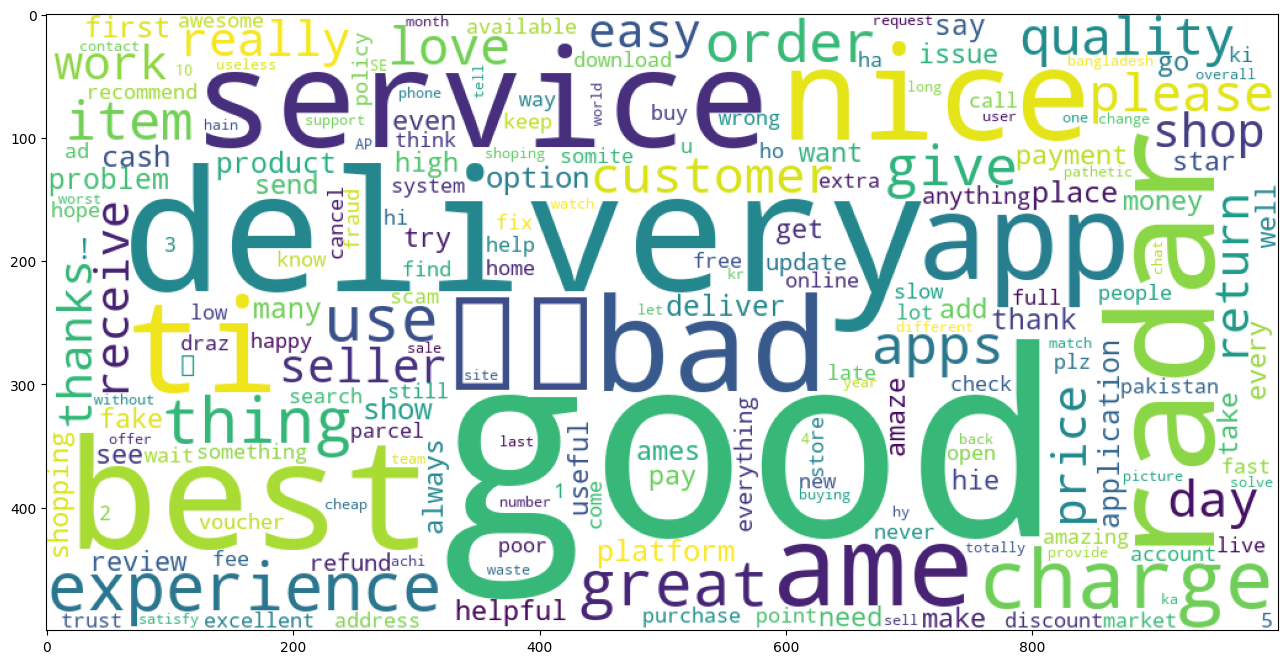

In [12]:
plt.figure(figsize=(20,8))
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate_from_frequencies(word_freq)
plt.imshow(wordcloud)